<a href="https://colab.research.google.com/github/hurricane195/Intro-to-Machine-Learning/blob/Homework-3/HW3_Q5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**HW3_Q5**

Problem 4: Use the cancer dataset to build a logistic regression model to classify the type of cancer (Malignant vs. benign). Use the PCA feature extraction for your training. Perform N number of independent training (N=1, …, K). Identify the optimum number of K, principal components that achieve the highest classification accuracy. Report your classification accuracy, precision, recall, and F1 score over a different number of Ks. Explain and elaborate on your results and compare them against problems 2 and 3.

**Problem 5: Can you repeat problem 4? This time, replace the logistic regression classifier with the Bayes classifier. Report your results (classification accuracy, precision, recall and F1 score). Compare your results against problems 2, 3 and 4.**

In [ ]:
#using a modified version of Dr. Tabkhi's "LinearRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/IntroCodes/LinearRegression.ipynb
#using a modified version of Dr. Tabkhi's "Pre_Processing" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/Pre_Processing.ipynb
#using a modified version of Dr. Tabkhi's "DummyRegressionValidation" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/RegressionCode/DummyRegressionValidation.ipynb
#using a modified version of Dr. Tabkhi's "LogisticRegression" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/LogisticRegression.ipynb
#using a modified version of Dr. Tabkhi's "LogisticRegression2" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/LogisticRegression2.ipynb
#using a modified version of Dr. Tabkhi's "PCAExample" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/%20PCAExample.ipynb
#using a modified version of Dr. Tabkhi's "Naive_Bayesian" code found at: https://github.com/HamedTabkhi/Intro-to-ML/blob/main/Classifier/Naive_Bayesian.ipynb

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

In [ ]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [ ]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
breast_labels = breast.target

In [ ]:
breast_labels.shape

(569,)

In [ ]:
labels = np.reshape(breast_labels,(569,1))

In [ ]:
#final_breast_data = np.concatenate([breast_data,labels],axis=1)
cancer = np.concatenate([breast_data,labels],axis=1)

In [ ]:
#final_breast_data.shape
cancer.shape

(569, 31)

In [ ]:
#breast_dataset = pd.DataFrame(final_breast_data)
cancer = pd.DataFrame(cancer)

In [ ]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
features_labels = np.append(features,'label')

In [ ]:
cancer.columns = features_labels

In [ ]:
#cancer = np.concatenate([breast_data,features_labels],axis=1)

In [ ]:
cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
"""
# List of variables to map

varlist = ['label']

# Defining the map function
def binary_map(x):
    return x.map({1: 'M', 0: 'B'})

cancer[varlist] = cancer[varlist].apply(binary_map)

cancer.head()
"""

"\n# List of variables to map\n\nvarlist = ['label']\n\n# Defining the map function\ndef binary_map(x):\n    return x.map({1: 'M', 0: 'B'})\n\ncancer[varlist] = cancer[varlist].apply(binary_map)\n\ncancer.head()\n"

In [ ]:
#breast_dataset.columns = features_labels
cancer.columns = features_labels

In [ ]:
#breast_dataset.tail()

In [ ]:
X = cancer.iloc[:,0:30].values
Y = cancer.iloc[:, 30].values

In [ ]:
#X[0:10]

In [ ]:
Y[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
X = StandardScaler().fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,9.192837,1.948583
1,2.387802,-3.768172
2,5.733896,-1.075174
3,7.122953,10.275589
4,3.935302,-1.948072


In [ ]:
finalDf = pd.concat([principalDf, cancer[['label']]], axis = 1)

In [ ]:
finalDf.head()

,principal component 1,principal component 2,label
0,9.192837,1.948583,0.0
1,2.387802,-3.768172,0.0
2,5.733896,-1.075174,0.0
3,7.122953,10.275589,0.0
4,3.935302,-1.948072,0.0


In [ ]:
"""
# List of variables to map

varlist = ['label']

# Defining the map function
def binary_map(x):
    return x.map({1: 'M', 0: 'B'})

finalDf[varlist] = finalDf[varlist].apply(binary_map)

finalDf.head()
"""

"\n# List of variables to map\n\nvarlist = ['label']\n\n# Defining the map function\ndef binary_map(x):\n    return x.map({1: 'M', 0: 'B'})\n\nfinalDf[varlist] = finalDf[varlist].apply(binary_map)\n\nfinalDf.head()\n"

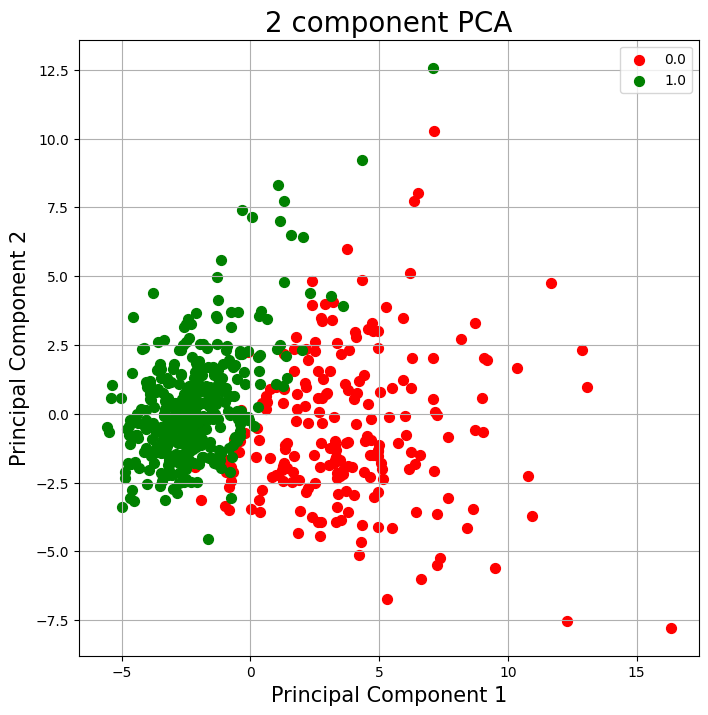

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0.0, 1.0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
x = finalDf.iloc[:,0:2].values
y = finalDf.iloc[:, 2].values

In [ ]:
#Now we’ll split our Data set into Training Data and Test Data. Training data will be used to train our
#Logistic model and Test data will be used to validate our model. We’ll use Sklearn to split our data. We’ll import  train_test_split from sklearn.model_selection

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
#Import LogisticRegression from sklearn.linear_model
#Make an instance classifier of the object LogisticRegression and give random_state =  0

classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [ ]:
Y_pred = classifier.predict(X_test)

In [ ]:
Y_pred

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.])

In [ ]:
#Using Confusion matrix we can get accuracy of our model.

from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[42,  5],
       [ 5, 62]])

In [ ]:
#Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall.
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, Y_pred))

Accuracy: 0.9122807017543859
Precision: 0.9253731343283582
Recall: 0.9253731343283582
F1 Score: 0.9253731343283582


Text(0.5, 427.9555555555555, 'Predicted label')

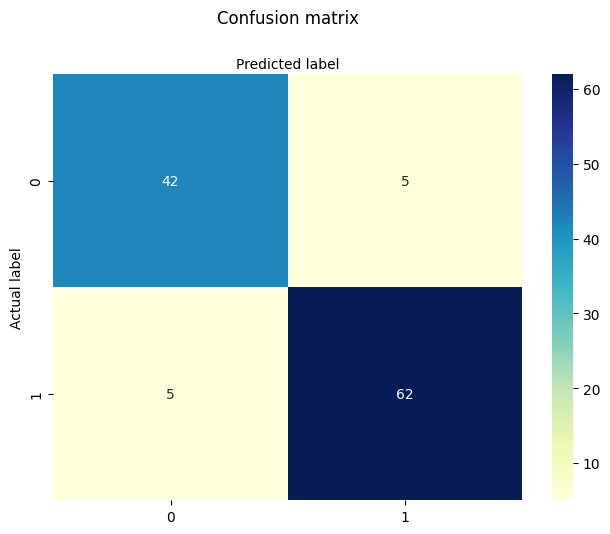

In [ ]:
#Let's visualize the results of the model in the form of a co#nfusion matrix using matplotlib and seaborn.
#Here, you will visualize the confusion matrix using Heatmap.
import seaborn as sns
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')